In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import time


In [3]:
# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Annual_IMERG_indices.xlsx', index_col=0)
df.reset_index(inplace=True)
df.rename(columns={'index': 'station'}, inplace=True)


In [26]:
# Preview data
print("🔎 Dataset Preview:")
display(df.head())

🔎 Dataset Preview:


,Index,2001CDD,2002CDD,2003CDD,2004CDD,2005CDD,2006CDD,2007CDD,2008CDD,2009CDD,...,2013CWDWinter,2014CWDWinter,2015CWDWinter,2016CWDWinter,2017CWDWinter,2018CWDWinter,2019CWDWinter,2020CWDWinter,avg_prcptot,high_rainfall_risk
0,1,50,74,50,84,106,132,88,96,107,...,2,1,2,1,1,2,2,1,253.901894,1
1,2,50,74,50,84,106,73,88,96,107,...,2,1,3,1,1,2,3,1,260.428743,1
2,3,61,67,77,84,106,139,87,65,84,...,3,1,2,1,1,2,3,1,277.237205,1
3,4,80,94,77,80,102,140,87,65,84,...,3,1,3,1,1,2,3,2,291.217821,1
4,5,76,64,50,85,107,116,57,66,150,...,3,1,2,1,1,2,2,3,334.091174,1


In [27]:
# Summary statistics
print("\n Summary Statistics:")
display(df.describe())


 Summary Statistics:


,Index,2001CDD,2002CDD,2003CDD,2004CDD,2005CDD,2006CDD,2007CDD,2008CDD,2009CDD,...,2013CWDWinter,2014CWDWinter,2015CWDWinter,2016CWDWinter,2017CWDWinter,2018CWDWinter,2019CWDWinter,2020CWDWinter,avg_prcptot,high_rainfall_risk
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,...,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,54.148244,63.628739,53.737971,50.694408,59.345254,86.969441,57.003901,60.461638,79.559168,...,3.208713,3.176853,3.391417,1.721717,1.695709,1.692458,4.356307,2.990897,212.324051,0.250325
std,444.126671,11.133197,15.240279,17.780330,16.609377,15.152439,40.485791,12.529262,19.235456,35.754486,...,1.183272,1.167187,1.566228,0.581036,0.809665,0.652074,2.062577,1.220054,56.892879,0.433341
min,1.000000,23.000000,21.000000,16.000000,17.000000,14.000000,14.000000,19.000000,20.000000,21.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,67.993859,0.000000
25%,385.250000,51.000000,62.000000,41.000000,40.000000,49.000000,48.250000,52.000000,43.000000,48.000000,...,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,2.000000,178.311014,0.000000
50%,769.500000,55.000000,68.000000,51.000000,46.000000,64.000000,85.000000,56.000000,63.000000,82.000000,...,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,3.000000,224.601180,0.000000
75%,1153.750000,55.000000,69.000000,63.000000,63.000000,70.000000,132.000000,60.000000,73.000000,107.000000,...,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,5.000000,4.000000,248.824797,0.750000
max,1538.000000,140.000000,147.000000,102.000000,117.000000,107.000000,154.000000,112.000000,149.000000,205.000000,...,13.000000,12.000000,19.000000,5.000000,7.000000,6.000000,15.000000,13.000000,378.601184,1.000000


In [28]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())



 Missing Values:
Index                 0
2001CDD               0
2002CDD               0
2003CDD               0
2004CDD               0
                     ..
2018CWDWinter         0
2019CWDWinter         0
2020CWDWinter         0
avg_prcptot           0
high_rainfall_risk    0
Length: 563, dtype: int64


In [29]:
# Check column types
print("\n Data Types:")
print(df.dtypes)



 Data Types:
Index                   int64
2001CDD                 int64
2002CDD                 int64
2003CDD                 int64
2004CDD                 int64
                       ...   
2018CWDWinter           int64
2019CWDWinter           int64
2020CWDWinter           int64
avg_prcptot           float64
high_rainfall_risk      int64
Length: 563, dtype: object


In [30]:
# Number of years covered (based on PRCPTOT columns)
prcp_cols = [col for col in df.columns if 'PRCPTOT' in col]
print(f"\n Number of PRCPTOT years: {len(prcp_cols)}")



 Number of PRCPTOT years: 140


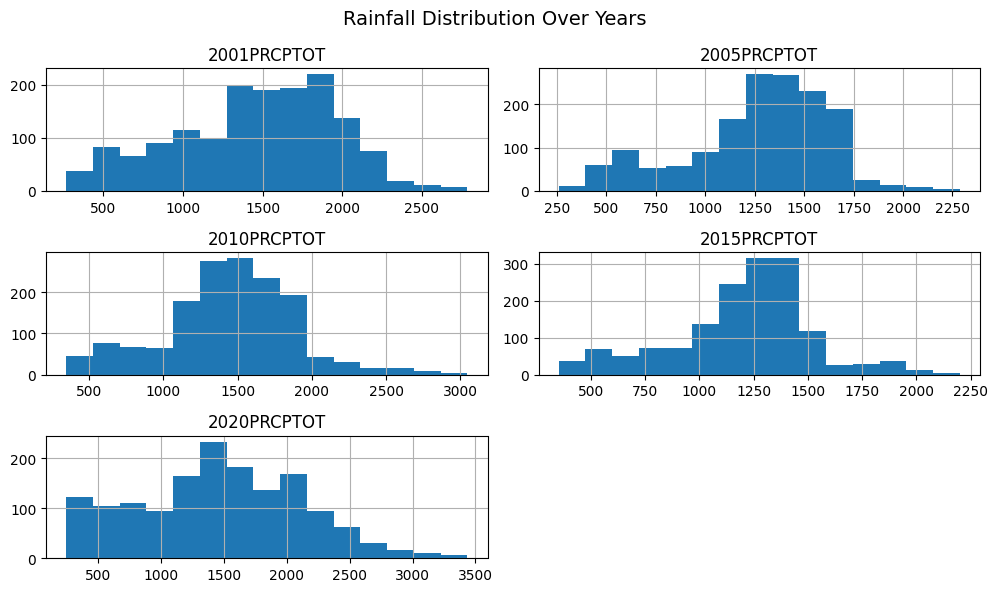

In [31]:
# Visualize distribution of a few key indices
import matplotlib.pyplot as plt
import seaborn as sns

sample_cols = ['2001PRCPTOT', '2005PRCPTOT', '2010PRCPTOT', '2015PRCPTOT', '2020PRCPTOT']
df[sample_cols].hist(figsize=(10, 6), bins=15)
plt.suptitle("Rainfall Distribution Over Years", fontsize=14)
plt.tight_layout()
plt.show()


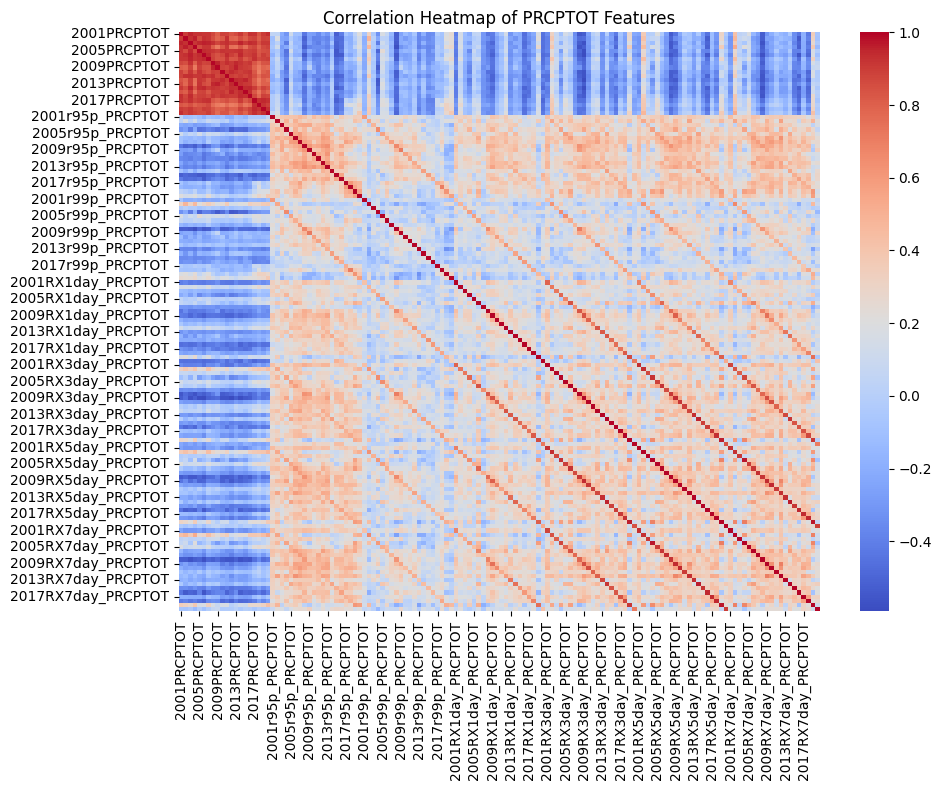

In [32]:
# Correlation heatmap of rainfall indices
rain_cols = [col for col in df.columns if 'PRCPTOT' in col]
plt.figure(figsize=(10, 8))
sns.heatmap(df[rain_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of PRCPTOT Features")
plt.tight_layout()
plt.show()


In [33]:
# Create and analyze target column
df['avg_prcptot'] = df[rain_cols].mean(axis=1)
threshold = df['avg_prcptot'].quantile(0.75)
df['high_rainfall_risk'] = (df['avg_prcptot'] >= threshold).astype(int)


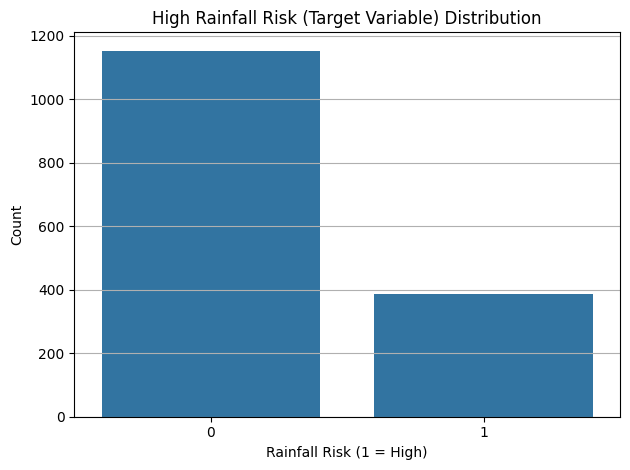

In [34]:
# Target distribution
sns.countplot(data=df, x='high_rainfall_risk')
plt.title("High Rainfall Risk (Target Variable) Distribution")
plt.xlabel("Rainfall Risk (1 = High)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [40]:
# Feature, Average total rainfall
rain_cols = [col for col in df.columns if 'PRCPTOT' in col]
df['avg_prcptot'] = df[rain_cols].mean(axis=1)

# Target, High rainfall risk = top 25%
threshold = df['avg_prcptot'].quantile(0.75)
df['high_rainfall_risk'] = (df['avg_prcptot'] >= threshold).astype(int)

# define Features and Labels
X = df[rain_cols]
y = df['high_rainfall_risk']

# Scale and Balance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_res, y_res = SMOTE(random_state=42).fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.6, random_state=42)


In [41]:
# Evaluation Function
def evaluate(model, X, y, name="Model"):
    y_pred = model.predict(X)
    print(f"\n===== {name} =====")
    print(classification_report(y, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X, y)
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    return y_pred, model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None



===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       689
           1       0.96      0.98      0.97       695

    accuracy                           0.97      1384
   macro avg       0.97      0.97      0.97      1384
weighted avg       0.97      0.97      0.97      1384



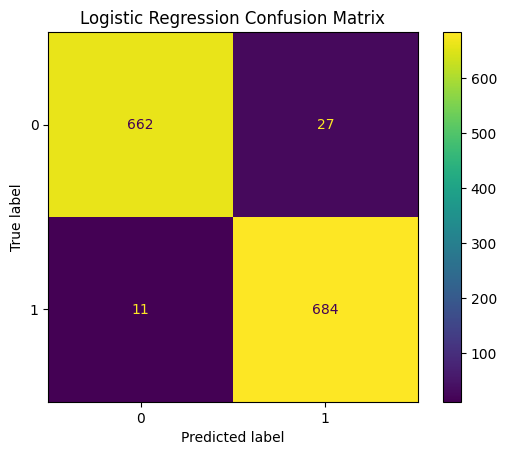


===== Random Forest (Non-Parallel) =====
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       689
           1       0.98      0.99      0.98       695

    accuracy                           0.98      1384
   macro avg       0.98      0.98      0.98      1384
weighted avg       0.98      0.98      0.98      1384



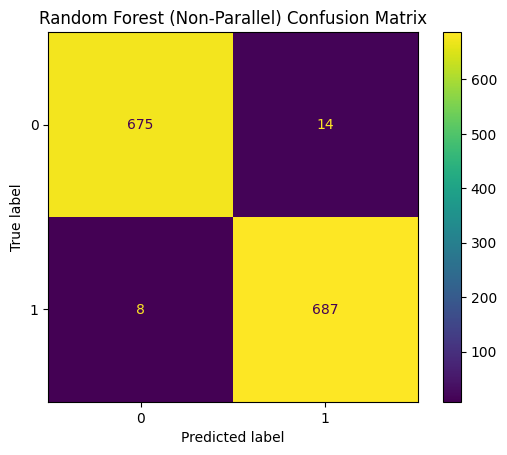


===== Random Forest (Parallel) =====
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       689
           1       0.98      0.99      0.98       695

    accuracy                           0.98      1384
   macro avg       0.98      0.98      0.98      1384
weighted avg       0.98      0.98      0.98      1384



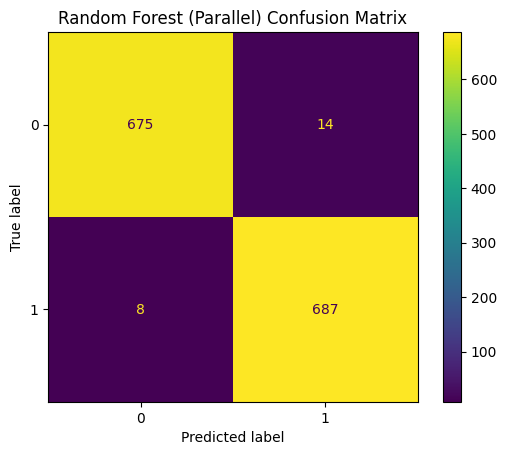

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:47:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



===== XGBoost (Non-Parallel) =====
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       689
           1       0.97      0.98      0.98       695

    accuracy                           0.98      1384
   macro avg       0.98      0.98      0.98      1384
weighted avg       0.98      0.98      0.98      1384



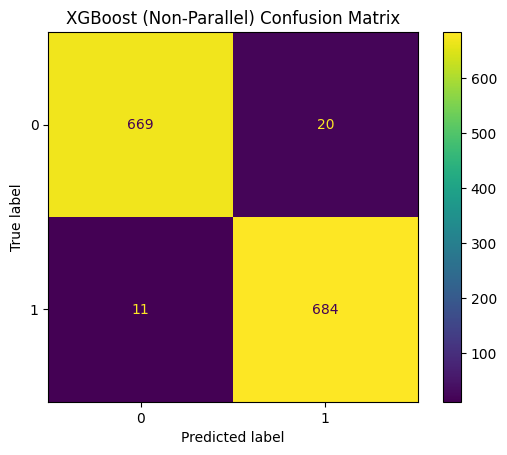

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:47:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



===== XGBoost (Parallel) =====
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       689
           1       0.97      0.98      0.98       695

    accuracy                           0.98      1384
   macro avg       0.98      0.98      0.98      1384
weighted avg       0.98      0.98      0.98      1384



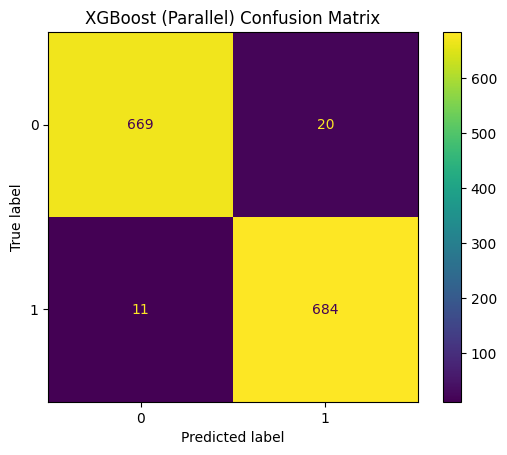


===== SVM =====
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       689
           1       0.95      0.98      0.97       695

    accuracy                           0.97      1384
   macro avg       0.97      0.97      0.97      1384
weighted avg       0.97      0.97      0.97      1384



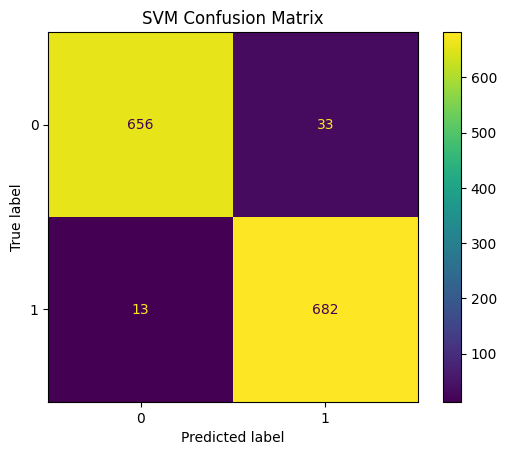

In [42]:

# Train and Evaluate Models
model_results = {}

# 1. Logistic Regression (non-parallel baseline)
start = time.time()
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
model_results['Logistic Regression'] = {
    "time": time.time() - start,
    "pred": evaluate(lr, X_test, y_test, "Logistic Regression")
}

# 2a. Random Forest (Non-Parallel)
start = time.time()
rf_np = RandomForestClassifier(n_jobs=1, random_state=42)
rf_np.fit(X_train, y_train)
model_results['Random Forest (Non-Parallel)'] = {
    "time": time.time() - start,
    "pred": evaluate(rf_np, X_test, y_test, "Random Forest (Non-Parallel)")
}

# 2b. Random Forest (Parallel)
start = time.time()
rf_p = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_p.fit(X_train, y_train)
model_results['Random Forest (Parallel)'] = {
    "time": time.time() - start,
    "pred": evaluate(rf_p, X_test, y_test, "Random Forest (Parallel)")
}

# 3a. XGBoost (Non-Parallel)
start = time.time()
xgb_np = XGBClassifier(n_jobs=1, use_label_encoder=False, eval_metric='logloss')
xgb_np.fit(X_train, y_train)
model_results['XGBoost (Non-Parallel)'] = {
    "time": time.time() - start,
    "pred": evaluate(xgb_np, X_test, y_test, "XGBoost (Non-Parallel)")
}

# 3b. XGBoost (Parallel)
start = time.time()
xgb_p = XGBClassifier(n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
xgb_p.fit(X_train, y_train)
model_results['XGBoost (Parallel)'] = {
    "time": time.time() - start,
    "pred": evaluate(xgb_p, X_test, y_test, "XGBoost (Parallel)")
}

# 4. SVM (default, non-parallel)
start = time.time()
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
model_results['SVM'] = {
    "time": time.time() - start,
    "pred": evaluate(svm, X_test, y_test, "SVM")
}


In [43]:
# Training Time
print("\n===== Training Times (Seconds) =====")
for model, result in model_results.items():
    print(f"{model}: {result['time']:.2f} s")



===== Training Times (Seconds) =====
Logistic Regression: 0.02 s
Random Forest (Non-Parallel): 0.66 s
Random Forest (Parallel): 0.55 s
XGBoost (Non-Parallel): 0.43 s
XGBoost (Parallel): 2.39 s
SVM: 0.13 s


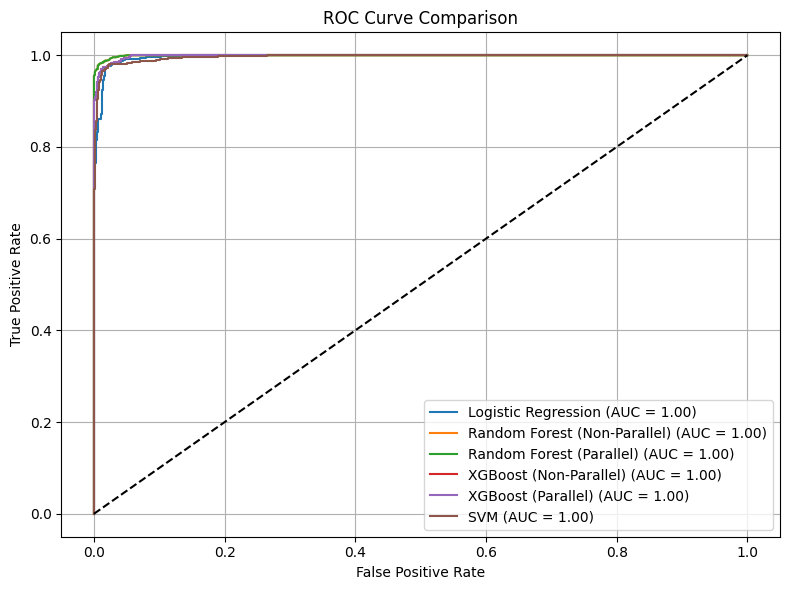

In [44]:
# ROC Curve for all models with probabilities
plt.figure(figsize=(8, 6))
for name, result in model_results.items():
    prob = result['pred'][1]
    if prob is not None:
        fpr, tpr, _ = roc_curve(y_test, prob)
        auc = roc_auc_score(y_test, prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
